In [68]:
import torch

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [69]:
# this makes our figures bigger
# pylab.rcParams['figure.figsize']=10, 6

In [70]:
def load(path):
    pil_image = Image.open(path).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

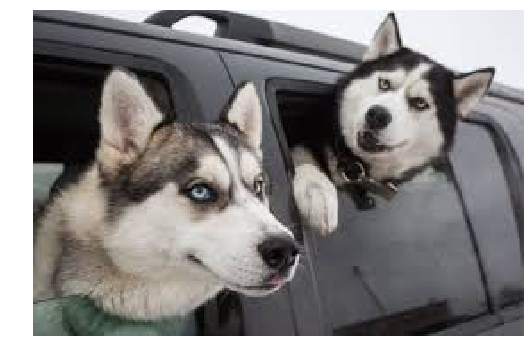

In [71]:
image = load("/home/liuhy/res/cv/maskrcnn-benchmark/demo/dog.jpg")
imshow(image)

In [72]:
img = torch.tensor(np.expand_dims(image, axis=0) / 255.0)
img = img.permute(0, 3,1, 2)
print(img.shape)

import torch.nn.functional as F
img_reshape = F.interpolate(img, size=(300, 300), mode='bilinear', align_corners=False)

torch.Size([1, 3, 183, 275])


In [73]:
print(img_reshape.shape)

torch.Size([1, 3, 300, 300])


In [74]:
image_reshape = img_reshape.permute(0, 2,3,1)[0]
print(image_reshape.shape)

torch.Size([300, 300, 3])


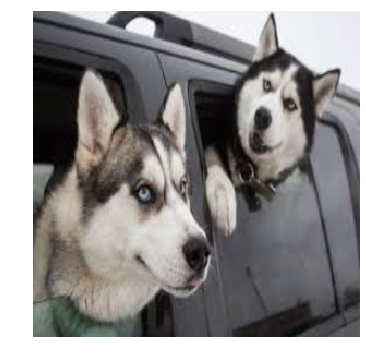

In [75]:
imshow(image_reshape.numpy())